# ResNet Gridsearch

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Extract the training runs and epochs
raw_data = """

 Training... (α=1e-4, λ=1e-4)
(Epoch 1) Train Loss: 5.0634, Train Accuracy: 0.0444 || Val Loss: 4.7278, Val Accuracy: 0.1250
(Epoch 2) Train Loss: 3.9410, Train Accuracy: 0.3299 || Val Loss: 4.1496, Val Accuracy: 0.1875
(Epoch 3) Train Loss: 3.0949, Train Accuracy: 0.5957 || Val Loss: 3.7092, Val Accuracy: 0.1875
(Epoch 4) Train Loss: 2.4627, Train Accuracy: 0.7615 || Val Loss: 3.4604, Val Accuracy: 0.3750
(Epoch 5) Train Loss: 1.9162, Train Accuracy: 0.8667 || Val Loss: 3.0877, Val Accuracy: 0.5625
(Epoch 6) Train Loss: 1.4734, Train Accuracy: 0.9385 || Val Loss: 2.8297, Val Accuracy: 0.6250
(Epoch 7) Train Loss: 1.1001, Train Accuracy: 0.9684 || Val Loss: 2.6156, Val Accuracy: 0.6875
(Epoch 8) Train Loss: 0.8194, Train Accuracy: 0.9855 || Val Loss: 2.3962, Val Accuracy: 0.6875
(Epoch 9) Train Loss: 0.5905, Train Accuracy: 0.9923 || Val Loss: 2.2424, Val Accuracy: 0.6875
(Epoch 10) Train Loss: 0.4524, Train Accuracy: 0.9932 || Val Loss: 2.1507, Val Accuracy: 0.6875
(Epoch 11) Train Loss: 0.3211, Train Accuracy: 0.9983 || Val Loss: 2.0057, Val Accuracy: 0.6875
(Epoch 12) Train Loss: 0.2460, Train Accuracy: 0.9966 || Val Loss: 1.9837, Val Accuracy: 0.6875
(Epoch 13) Train Loss: 0.1820, Train Accuracy: 0.9949 || Val Loss: 1.7638, Val Accuracy: 0.6875
(Epoch 14) Train Loss: 0.1354, Train Accuracy: 0.9991 || Val Loss: 1.9220, Val Accuracy: 0.6875
(Epoch 15) Train Loss: 0.1056, Train Accuracy: 0.9983 || Val Loss: 1.7674, Val Accuracy: 0.6875
(Epoch 16) Train Loss: 0.0850, Train Accuracy: 0.9991 || Val Loss: 1.7896, Val Accuracy: 0.6875
Early stopping triggered!

 Training... (α=1e-4, λ=1e-3)
(Epoch 1) Train Loss: 5.1014, Train Accuracy: 0.0342 || Val Loss: 4.8044, Val Accuracy: 0.0625
(Epoch 2) Train Loss: 3.9341, Train Accuracy: 0.3427 || Val Loss: 4.2091, Val Accuracy: 0.1875
(Epoch 3) Train Loss: 3.0852, Train Accuracy: 0.5932 || Val Loss: 3.7696, Val Accuracy: 0.3125
(Epoch 4) Train Loss: 2.3995, Train Accuracy: 0.7598 || Val Loss: 3.3858, Val Accuracy: 0.4375
(Epoch 5) Train Loss: 1.8676, Train Accuracy: 0.8863 || Val Loss: 3.0358, Val Accuracy: 0.5000
(Epoch 6) Train Loss: 1.4393, Train Accuracy: 0.9419 || Val Loss: 2.7182, Val Accuracy: 0.5625
(Epoch 7) Train Loss: 1.0832, Train Accuracy: 0.9692 || Val Loss: 2.5682, Val Accuracy: 0.6250
(Epoch 8) Train Loss: 0.7767, Train Accuracy: 0.9889 || Val Loss: 2.3686, Val Accuracy: 0.6250
(Epoch 9) Train Loss: 0.5711, Train Accuracy: 0.9957 || Val Loss: 2.2546, Val Accuracy: 0.6875
(Epoch 10) Train Loss: 0.4134, Train Accuracy: 0.9957 || Val Loss: 2.1250, Val Accuracy: 0.6875
(Epoch 11) Train Loss: 0.3061, Train Accuracy: 0.9991 || Val Loss: 2.0426, Val Accuracy: 0.6875
(Epoch 12) Train Loss: 0.2211, Train Accuracy: 0.9966 || Val Loss: 1.9429, Val Accuracy: 0.6875
(Epoch 13) Train Loss: 0.1757, Train Accuracy: 0.9974 || Val Loss: 1.8917, Val Accuracy: 0.6875
(Epoch 14) Train Loss: 0.1405, Train Accuracy: 0.9983 || Val Loss: 1.9011, Val Accuracy: 0.6875
(Epoch 15) Train Loss: 0.1076, Train Accuracy: 0.9983 || Val Loss: 1.7086, Val Accuracy: 0.6875
(Epoch 16) Train Loss: 0.0843, Train Accuracy: 0.9966 || Val Loss: 1.7409, Val Accuracy: 0.6875
(Epoch 17) Train Loss: 0.0702, Train Accuracy: 0.9983 || Val Loss: 1.7631, Val Accuracy: 0.6875
(Epoch 18) Train Loss: 0.0652, Train Accuracy: 1.0000 || Val Loss: 1.7888, Val Accuracy: 0.6875
Early stopping triggered!

 Training... (α=1e-4, λ=0.01)
(Epoch 1) Train Loss: 5.1556, Train Accuracy: 0.0197 || Val Loss: 4.8466, Val Accuracy: 0.0625
(Epoch 2) Train Loss: 4.1737, Train Accuracy: 0.2470 || Val Loss: 4.2001, Val Accuracy: 0.2500
(Epoch 3) Train Loss: 3.3975, Train Accuracy: 0.5265 || Val Loss: 3.8018, Val Accuracy: 0.4375
(Epoch 4) Train Loss: 2.7398, Train Accuracy: 0.7128 || Val Loss: 3.4012, Val Accuracy: 0.5000
(Epoch 5) Train Loss: 2.2087, Train Accuracy: 0.8299 || Val Loss: 3.0830, Val Accuracy: 0.6250
(Epoch 6) Train Loss: 1.7090, Train Accuracy: 0.9145 || Val Loss: 2.8382, Val Accuracy: 0.6875
(Epoch 7) Train Loss: 1.2973, Train Accuracy: 0.9581 || Val Loss: 2.7092, Val Accuracy: 0.6875
(Epoch 8) Train Loss: 0.9987, Train Accuracy: 0.9744 || Val Loss: 2.3271, Val Accuracy: 0.7500
(Epoch 9) Train Loss: 0.7196, Train Accuracy: 0.9872 || Val Loss: 2.3241, Val Accuracy: 0.7500
(Epoch 10) Train Loss: 0.5309, Train Accuracy: 0.9906 || Val Loss: 2.1880, Val Accuracy: 0.7500
(Epoch 11) Train Loss: 0.3874, Train Accuracy: 0.9940 || Val Loss: 2.1874, Val Accuracy: 0.7500
(Epoch 12) Train Loss: 0.3117, Train Accuracy: 0.9974 || Val Loss: 2.0287, Val Accuracy: 0.6875
(Epoch 13) Train Loss: 0.2182, Train Accuracy: 0.9974 || Val Loss: 2.0317, Val Accuracy: 0.7500
(Epoch 14) Train Loss: 0.1802, Train Accuracy: 0.9991 || Val Loss: 1.9250, Val Accuracy: 0.7500
(Epoch 15) Train Loss: 0.1606, Train Accuracy: 0.9974 || Val Loss: 1.8630, Val Accuracy: 0.7500
(Epoch 16) Train Loss: 0.1330, Train Accuracy: 1.0000 || Val Loss: 1.7551, Val Accuracy: 0.7500
(Epoch 17) Train Loss: 0.1172, Train Accuracy: 0.9983 || Val Loss: 2.0432, Val Accuracy: 0.6875
(Epoch 18) Train Loss: 0.1062, Train Accuracy: 0.9983 || Val Loss: 1.8698, Val Accuracy: 0.7500
(Epoch 19) Train Loss: 0.0982, Train Accuracy: 0.9983 || Val Loss: 2.0530, Val Accuracy: 0.6875
Early stopping triggered!

 Training... (α=1e-3, λ=1e-4)
(Epoch 1) Train Loss: 3.7116, Train Accuracy: 0.2932 || Val Loss: 4.4419, Val Accuracy: 0.2500
(Epoch 2) Train Loss: 1.0840, Train Accuracy: 0.8650 || Val Loss: 2.0853, Val Accuracy: 0.5625
(Epoch 3) Train Loss: 0.3346, Train Accuracy: 0.9632 || Val Loss: 1.8297, Val Accuracy: 0.7500
(Epoch 4) Train Loss: 0.2038, Train Accuracy: 0.9692 || Val Loss: 1.6290, Val Accuracy: 0.7500
(Epoch 5) Train Loss: 0.1197, Train Accuracy: 0.9803 || Val Loss: 1.8370, Val Accuracy: 0.6875
(Epoch 6) Train Loss: 0.0986, Train Accuracy: 0.9838 || Val Loss: 1.4011, Val Accuracy: 0.7500
(Epoch 7) Train Loss: 0.0927, Train Accuracy: 0.9829 || Val Loss: 1.4641, Val Accuracy: 0.6875
(Epoch 8) Train Loss: 0.0883, Train Accuracy: 0.9795 || Val Loss: 1.6859, Val Accuracy: 0.7500
(Epoch 9) Train Loss: 0.0760, Train Accuracy: 0.9880 || Val Loss: 1.9329, Val Accuracy: 0.6875
Early stopping triggered!

 Training... (α=1e-3, λ=1e-3)
(Epoch 1) Train Loss: 3.7333, Train Accuracy: 0.2761 || Val Loss: 3.6000, Val Accuracy: 0.2500
(Epoch 2) Train Loss: 1.1977, Train Accuracy: 0.8427 || Val Loss: 2.0750, Val Accuracy: 0.6250
(Epoch 3) Train Loss: 0.4023, Train Accuracy: 0.9530 || Val Loss: 1.5567, Val Accuracy: 0.7500
(Epoch 4) Train Loss: 0.2349, Train Accuracy: 0.9675 || Val Loss: 2.2466, Val Accuracy: 0.6250
(Epoch 5) Train Loss: 0.2006, Train Accuracy: 0.9718 || Val Loss: 2.0858, Val Accuracy: 0.5625
(Epoch 6) Train Loss: 0.1980, Train Accuracy: 0.9709 || Val Loss: 1.5160, Val Accuracy: 0.8125
(Epoch 7) Train Loss: 0.2049, Train Accuracy: 0.9590 || Val Loss: 1.7371, Val Accuracy: 0.6875
(Epoch 8) Train Loss: 0.1817, Train Accuracy: 0.9692 || Val Loss: 1.8887, Val Accuracy: 0.6875
(Epoch 9) Train Loss: 0.1700, Train Accuracy: 0.9624 || Val Loss: 1.9673, Val Accuracy: 0.6875
Early stopping triggered!

 Training... (α=1e-3, λ=0.01)
(Epoch 1) Train Loss: 3.7456, Train Accuracy: 0.2769 || Val Loss: 3.8604, Val Accuracy: 0.2500
(Epoch 2) Train Loss: 1.4833, Train Accuracy: 0.7607 || Val Loss: 3.2859, Val Accuracy: 0.3750
(Epoch 3) Train Loss: 1.0735, Train Accuracy: 0.8188 || Val Loss: 2.8978, Val Accuracy: 0.5000
(Epoch 4) Train Loss: 0.9552, Train Accuracy: 0.8393 || Val Loss: 2.9631, Val Accuracy: 0.3125
(Epoch 5) Train Loss: 1.0170, Train Accuracy: 0.8325 || Val Loss: 4.7166, Val Accuracy: 0.2500
(Epoch 6) Train Loss: 0.9476, Train Accuracy: 0.8410 || Val Loss: 3.2432, Val Accuracy: 0.3125
Early stopping triggered!

 Training... (α=0.01, λ=1e-4)
(Epoch 1) Train Loss: 7.2435, Train Accuracy: 0.0145 || Val Loss: 5.5245, Val Accuracy: 0.0000
(Epoch 2) Train Loss: 5.3094, Train Accuracy: 0.0316 || Val Loss: 4.8893, Val Accuracy: 0.1250
(Epoch 3) Train Loss: 4.0878, Train Accuracy: 0.0932 || Val Loss: 5.4559, Val Accuracy: 0.0625
(Epoch 4) Train Loss: 3.0228, Train Accuracy: 0.2427 || Val Loss: 5.3977, Val Accuracy: 0.0625
(Epoch 5) Train Loss: 2.2807, Train Accuracy: 0.3880 || Val Loss: 4.4883, Val Accuracy: 0.1250
(Epoch 6) Train Loss: 1.6498, Train Accuracy: 0.5120 || Val Loss: 4.7331, Val Accuracy: 0.3125
(Epoch 7) Train Loss: 1.2419, Train Accuracy: 0.6214 || Val Loss: 6.1656, Val Accuracy: 0.1875
(Epoch 8) Train Loss: 1.1194, Train Accuracy: 0.6735 || Val Loss: 6.2115, Val Accuracy: 0.1875
Early stopping triggered!

 Training... (α=0.01, λ=1e-3)
(Epoch 1) Train Loss: 7.3390, Train Accuracy: 0.0103 || Val Loss: 6.3077, Val Accuracy: 0.0000
(Epoch 2) Train Loss: 5.1513, Train Accuracy: 0.0256 || Val Loss: 5.9376, Val Accuracy: 0.0000
(Epoch 3) Train Loss: 4.0999, Train Accuracy: 0.0778 || Val Loss: 5.5329, Val Accuracy: 0.0000
(Epoch 4) Train Loss: 3.4660, Train Accuracy: 0.1436 || Val Loss: 5.7433, Val Accuracy: 0.0625
(Epoch 5) Train Loss: 2.8070, Train Accuracy: 0.2812 || Val Loss: 4.8082, Val Accuracy: 0.1875
(Epoch 6) Train Loss: 2.2821, Train Accuracy: 0.3641 || Val Loss: 4.3055, Val Accuracy: 0.1250
(Epoch 7) Train Loss: 1.8586, Train Accuracy: 0.4590 || Val Loss: 5.4866, Val Accuracy: 0.0625
(Epoch 8) Train Loss: 1.4565, Train Accuracy: 0.5752 || Val Loss: 6.5727, Val Accuracy: 0.0625
(Epoch 9) Train Loss: 1.3956, Train Accuracy: 0.6026 || Val Loss: 5.0672, Val Accuracy: 0.1250
Early stopping triggered!

 Training... (α=0.01, λ=0.01)
(Epoch 1) Train Loss: 6.4084, Train Accuracy: 0.0162 || Val Loss: 4.9540, Val Accuracy: 0.0000
(Epoch 2) Train Loss: 5.2161, Train Accuracy: 0.0128 || Val Loss: 5.0820, Val Accuracy: 0.0000
(Epoch 3) Train Loss: 4.5855, Train Accuracy: 0.0368 || Val Loss: 4.9355, Val Accuracy: 0.0000
(Epoch 4) Train Loss: 4.2063, Train Accuracy: 0.0692 || Val Loss: 6.2779, Val Accuracy: 0.0000
(Epoch 5) Train Loss: 3.8767, Train Accuracy: 0.1000 || Val Loss: 5.0450, Val Accuracy: 0.0000
(Epoch 6) Train Loss: 3.4420, Train Accuracy: 0.1444 || Val Loss: 4.0698, Val Accuracy: 0.0625
(Epoch 7) Train Loss: 3.2674, Train Accuracy: 0.1573 || Val Loss: 5.8778, Val Accuracy: 0.0000
(Epoch 8) Train Loss: 3.1495, Train Accuracy: 0.2120 || Val Loss: 5.6079, Val Accuracy: 0.0000
(Epoch 9) Train Loss: 3.0849, Train Accuracy: 0.1991 || Val Loss: 4.9149, Val Accuracy: 0.0625
Early stopping triggered!

 Training... (α=0.1, λ=1e-4)
(Epoch 1) Train Loss: 18.5539, Train Accuracy: 0.0068 || Val Loss: 5.4340, Val Accuracy: 0.0625
(Epoch 2) Train Loss: 4.6474, Train Accuracy: 0.0350 || Val Loss: 17.3625, Val Accuracy: 0.0000
(Epoch 3) Train Loss: 3.8627, Train Accuracy: 0.1043 || Val Loss: 9.7796, Val Accuracy: 0.0625
(Epoch 4) Train Loss: 2.7628, Train Accuracy: 0.2983 || Val Loss: 4.9866, Val Accuracy: 0.1875
(Epoch 5) Train Loss: 1.8423, Train Accuracy: 0.5034 || Val Loss: 4.9361, Val Accuracy: 0.3125
(Epoch 6) Train Loss: 1.4738, Train Accuracy: 0.5718 || Val Loss: 6.0708, Val Accuracy: 0.2500
(Epoch 7) Train Loss: 0.9983, Train Accuracy: 0.7120 || Val Loss: 7.3743, Val Accuracy: 0.1875
(Epoch 8) Train Loss: 0.8737, Train Accuracy: 0.7590 || Val Loss: 13.0146, Val Accuracy: 0.1875
Early stopping triggered!

 Training... (α=0.1, λ=1e-3)
(Epoch 1) Train Loss: 14.7664, Train Accuracy: 0.0111 || Val Loss: 6.2281, Val Accuracy: 0.0000
(Epoch 2) Train Loss: 4.6684, Train Accuracy: 0.0359 || Val Loss: 6.3923, Val Accuracy: 0.0000
(Epoch 3) Train Loss: 3.7552, Train Accuracy: 0.1077 || Val Loss: 22.0038, Val Accuracy: 0.0000
(Epoch 4) Train Loss: 3.1845, Train Accuracy: 0.1991 || Val Loss: 6.5581, Val Accuracy: 0.0000
Early stopping triggered!

 Training... (α=0.1, λ=0.01)
(Epoch 1) Train Loss: 11.4974, Train Accuracy: 0.0060 || Val Loss: 5.2775, Val Accuracy: 0.0000
(Epoch 2) Train Loss: 5.1539, Train Accuracy: 0.0162 || Val Loss: 4.8549, Val Accuracy: 0.0625
(Epoch 3) Train Loss: 5.0120, Train Accuracy: 0.0128 || Val Loss: 5.9049, Val Accuracy: 0.0000
(Epoch 4) Train Loss: 4.8044, Train Accuracy: 0.0325 || Val Loss: 7.3624, Val Accuracy: 0.0000
(Epoch 5) Train Loss: 4.5725, Train Accuracy: 0.0325 || Val Loss: 6.9334, Val Accuracy: 0.0000
Early stopping triggered!
1.401084154844284

"""

# Use regex to extract training configurations and results
run_pattern = re.compile(r"Training... \((.*?)\)")
epoch_pattern = re.compile(r"\(Epoch (\d+)\).*?Val Accuracy: ([\d.]+)")

runs = []
epochs = []
val_accuracies = []
configurations = []

for line in raw_data.split("\n"):
    run_match = run_pattern.search(line)
    epoch_match = epoch_pattern.search(line)

    if run_match:
        current_run = run_match.group(1)

    if epoch_match:
        epochs.append(int(epoch_match.group(1)))
        val_accuracies.append(float(epoch_match.group(2)))
        configurations.append(current_run)

# Create a DataFrame
df = pd.DataFrame(
    {
        "Epoch": epochs,
        "Validation Accuracy": val_accuracies,
        "Run Configuration": configurations,
    }
)

display(df)

,Epoch,Validation Accuracy,Run Configuration
0,1,0.1250,"α=1e-4, λ=1e-4"
1,2,0.1875,"α=1e-4, λ=1e-4"
2,3,0.1875,"α=1e-4, λ=1e-4"
3,4,0.3750,"α=1e-4, λ=1e-4"
4,5,0.5625,"α=1e-4, λ=1e-4"
...,...,...,...
115,1,0.0000,"α=0.1, λ=0.01"
116,2,0.0625,"α=0.1, λ=0.01"
117,3,0.0000,"α=0.1, λ=0.01"
118,4,0.0000,"α=0.1, λ=0.01"


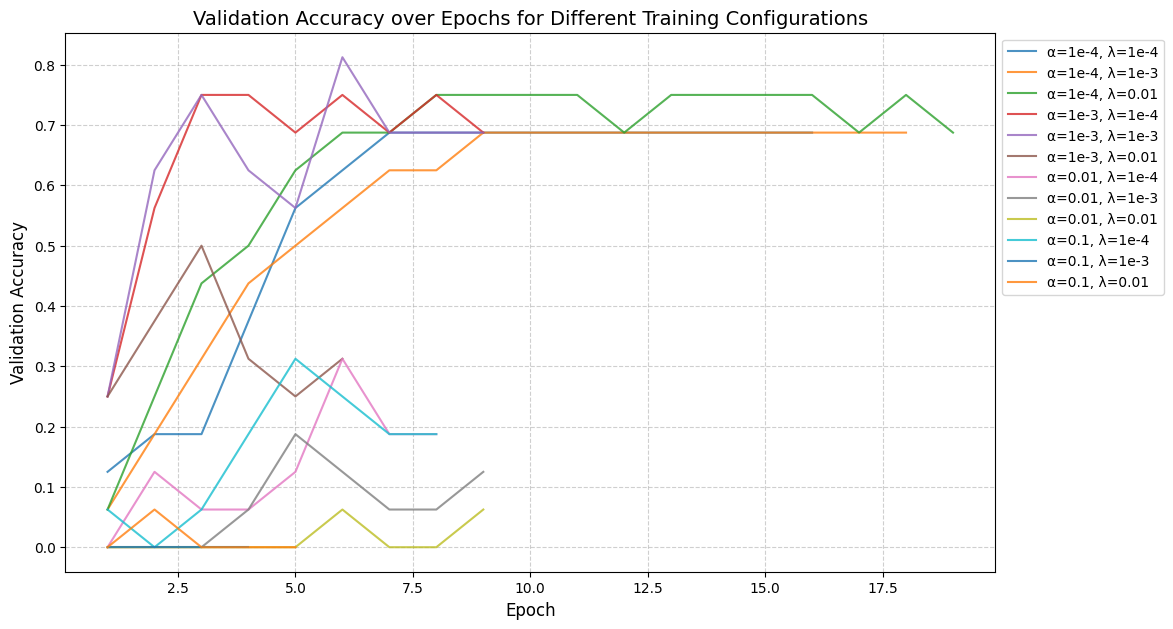

In [157]:
# Plot the validation accuracy over epochs for each run configuration
plt.figure(figsize=(12, 7))

# Get unique configurations
uniqueConfigs = df["Run Configuration"].unique()

# Use different line styles and increased marker size for clarity
for config in uniqueConfigs:
    subset = df[df["Run Configuration"] == config]
    plt.plot(
        subset["Epoch"], 
        subset["Validation Accuracy"], 
        marker="", linestyle="-", markersize=6, alpha=0.8, label=config
    )

# Improve labels and title
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Validation Accuracy", fontsize=12)
plt.title("Validation Accuracy over Epochs for Different Training Configurations", fontsize=14)

# Improve legend readability by placing it outside the plot
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)

# Add grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Show the improved plot
plt.show()

C:\Users\jack0\AppData\Local\Temp\ipykernel_18368\1429643028.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(uniqueConfigs))(range(len(uniqueConfigs)))


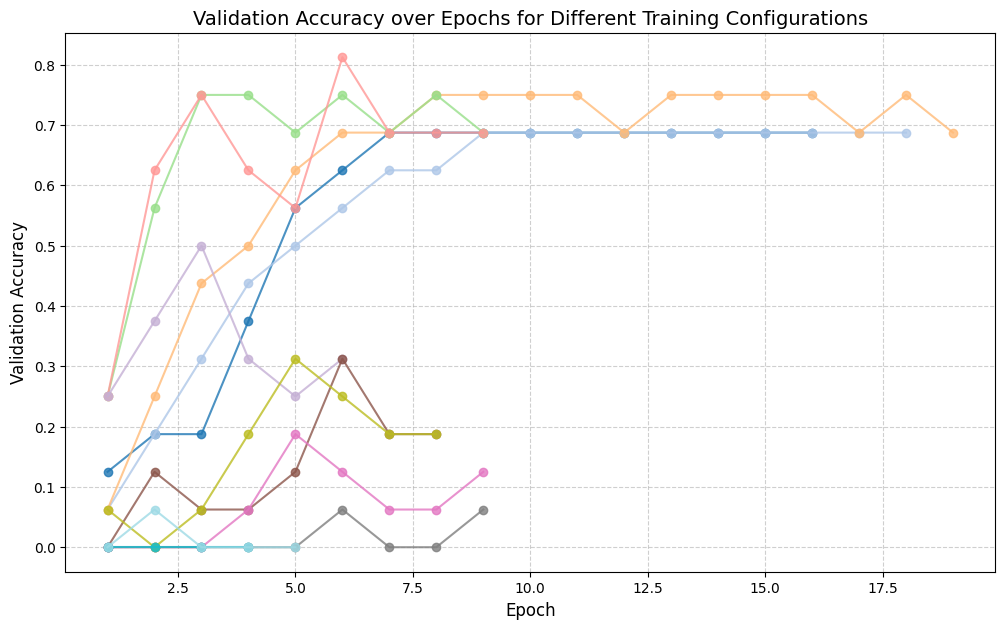

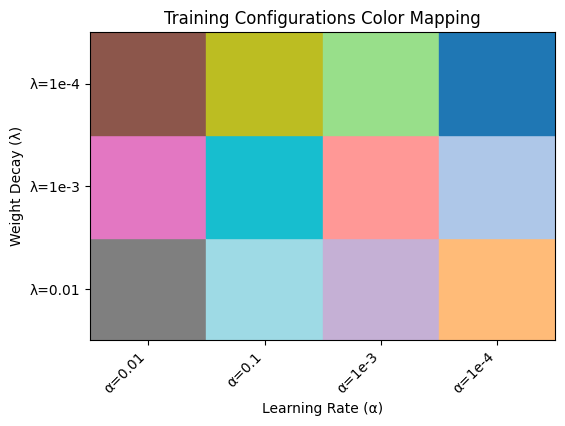

C:\Users\jack0\AppData\Local\Temp\ipykernel_18368\1429643028.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_legend.show()


In [158]:
import numpy as np

# Extract unique values of alpha and lambda
alphas = sorted(set([config.split(", ")[0] for config in uniqueConfigs]))
lambdas = sorted(set([config.split(", ")[1] for config in uniqueConfigs]))

# Create a colormap dictionary for mapping colors to configurations
colors = plt.cm.get_cmap("tab20", len(uniqueConfigs))(range(len(uniqueConfigs)))
color_map = {config: colors[i] for i, config in enumerate(uniqueConfigs)}

# Create a figure for the plot and the legend grid
fig, ax = plt.subplots(figsize=(12, 7))

# Plot each configuration separately
for config in uniqueConfigs:
    subset = df[df["Run Configuration"] == config]
    ax.plot(
        subset["Epoch"], 
        subset["Validation Accuracy"], 
        marker="o", linestyle="-", markersize=6, alpha=0.8, 
        color=color_map[config], label=config
    )

# Improve labels and title
ax.set_xlabel("Epoch", fontsize=12)
ax.set_ylabel("Validation Accuracy", fontsize=12)
ax.set_title("Validation Accuracy over Epochs for Different Training Configurations", fontsize=14)
ax.grid(True, linestyle="--", alpha=0.6)

# Create the grid legend
fig_legend, ax_legend = plt.subplots(figsize=(6, 4))

ax_legend.set_xlim(-0.5, len(alphas) - 0.5)
ax_legend.set_ylim(-0.5, len(lambdas) - 0.5)

ax_legend.set_xticks(range(len(alphas)))
ax_legend.set_yticks(range(len(lambdas)))
ax_legend.set_xticklabels(alphas, rotation=45, ha="right")
ax_legend.set_yticklabels(lambdas)
ax_legend.set_xlabel("Learning Rate (α)")
ax_legend.set_ylabel("Weight Decay (λ)")
ax_legend.set_title("Training Configurations Color Mapping")

# Fill grid with colors
for i, alpha in enumerate(alphas):
    for j, lambda_ in enumerate(lambdas):
        config_key = f"{alpha}, {lambda_}"
        if config_key in color_map:
            ax_legend.add_patch(plt.Rectangle((i - 0.5, j - 0.5), 1, 1, color=color_map[config_key]))

# Display the improved plot
plt.show()
fig_legend.show()


In [159]:
print(colors)

[[0.12156863 0.46666667 0.70588235 1.        ]
 [0.68235294 0.78039216 0.90980392 1.        ]
 [1.         0.73333333 0.47058824 1.        ]
 [0.59607843 0.8745098  0.54117647 1.        ]
 [1.         0.59607843 0.58823529 1.        ]
 [0.77254902 0.69019608 0.83529412 1.        ]
 [0.54901961 0.3372549  0.29411765 1.        ]
 [0.89019608 0.46666667 0.76078431 1.        ]
 [0.49803922 0.49803922 0.49803922 1.        ]
 [0.7372549  0.74117647 0.13333333 1.        ]
 [0.09019608 0.74509804 0.81176471 1.        ]
 [0.61960784 0.85490196 0.89803922 1.        ]]


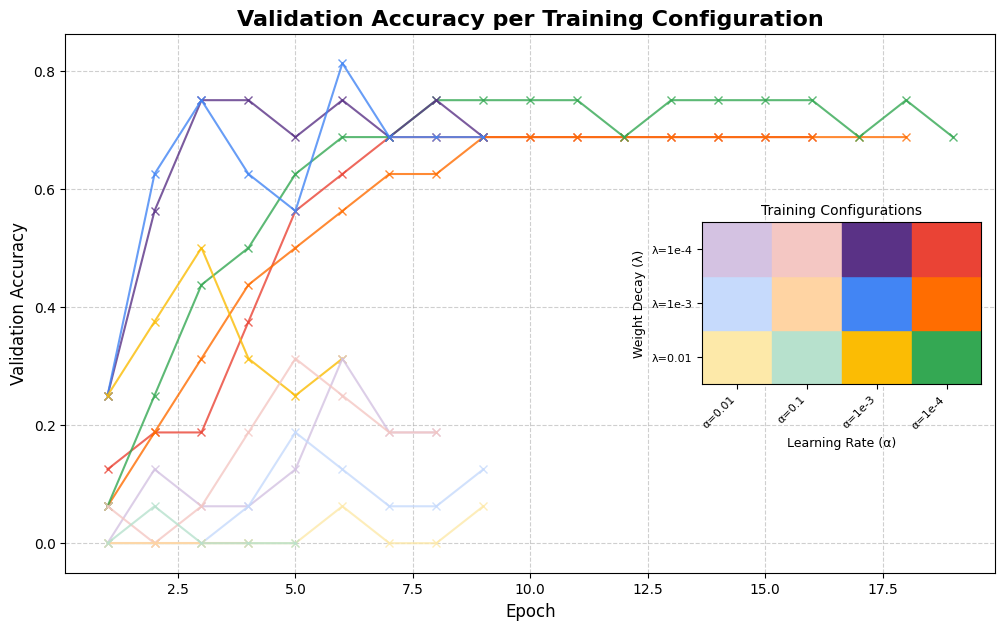

In [160]:
# Extract unique values of alpha and lambda
uniqueConfigs = df["Run Configuration"].unique()
alphas = sorted(set([config.split(", ")[0] for config in uniqueConfigs]))
lambdas = sorted(set([config.split(", ")[1] for config in uniqueConfigs]))

# Create a colormap dictionary for mapping colors to configurations
baseColors = [
    "#ea4335", # red
    "#ff6d01", # orange
    "#34a853", # green
    "#5a3286", # purple
    "#4285f4", # blue
    "#fbbc04", # yellow
]
lightColors = [
    "#d4c2e2", # light purple
    "#c6dafc", # light blue
    "#fde9a9", # light yellow
    "#f4c7c3", # light red
    "#ffd4a3", # light orange
    "#b7e1cd", # light green
]
colors = baseColors + lightColors
# colors = plt.cm.get_cmap("tab20", len(uniqueConfigs))(range(len(uniqueConfigs)))
colorMap = {config: colors[i] for i, config in enumerate(uniqueConfigs)}

# Create figure and main plot
fig, ax = plt.subplots(figsize=(12, 7))

# Plot each configuration separately
for config in uniqueConfigs:
    subset = df[df["Run Configuration"] == config]
    ax.plot(
        subset["Epoch"], 
        subset["Validation Accuracy"], 
        marker="x", linestyle="-", markersize=6, alpha=0.8, 
        color=colorMap[config], label=config
    )

# Improve labels and title
ax.set_xlabel("Epoch", fontsize=12)
ax.set_ylabel("Validation Accuracy", fontsize=12)
ax.set_title("Validation Accuracy per Training Configuration", fontsize=16, fontweight="bold")
ax.set_ylim([min(df["Validation Accuracy"]) - 0.05, max(df["Validation Accuracy"]) + 0.05])
ax.grid(True, linestyle="--", alpha=0.6)

# Create inset axes for the legend within the main plot
axLegend = inset_axes(ax, width="30%", height="30%", loc="right", borderpad=1)

# Set grid limits and labels
axLegend.set_xlim(-0.5, len(alphas) - 0.5)
axLegend.set_ylim(-0.5, len(lambdas) - 0.5)
axLegend.set_xticks(range(len(alphas)))
axLegend.set_yticks(range(len(lambdas)))
axLegend.set_xticklabels(alphas, rotation=45, ha="right", fontsize=8)
axLegend.set_yticklabels(lambdas, fontsize=8)
axLegend.set_xlabel("Learning Rate (α)", fontsize=9)
axLegend.set_ylabel("Weight Decay (λ)", fontsize=9)
axLegend.set_title("Training Configurations", fontsize=10)

# axLegend.patch.set_linewidth(1.5)
# axLegend.patch.set_edgecolor("black")

# Fill grid with colors
for i, alpha in enumerate(alphas):
    for j, lambda_ in enumerate(lambdas):
        configKey = f"{alpha}, {lambda_}"
        if configKey in colorMap:
            axLegend.add_patch(plt.Rectangle((i - 0.5, j - 0.5), 1, 1, color=colorMap[configKey]))

# Display the final plot
plt.show()

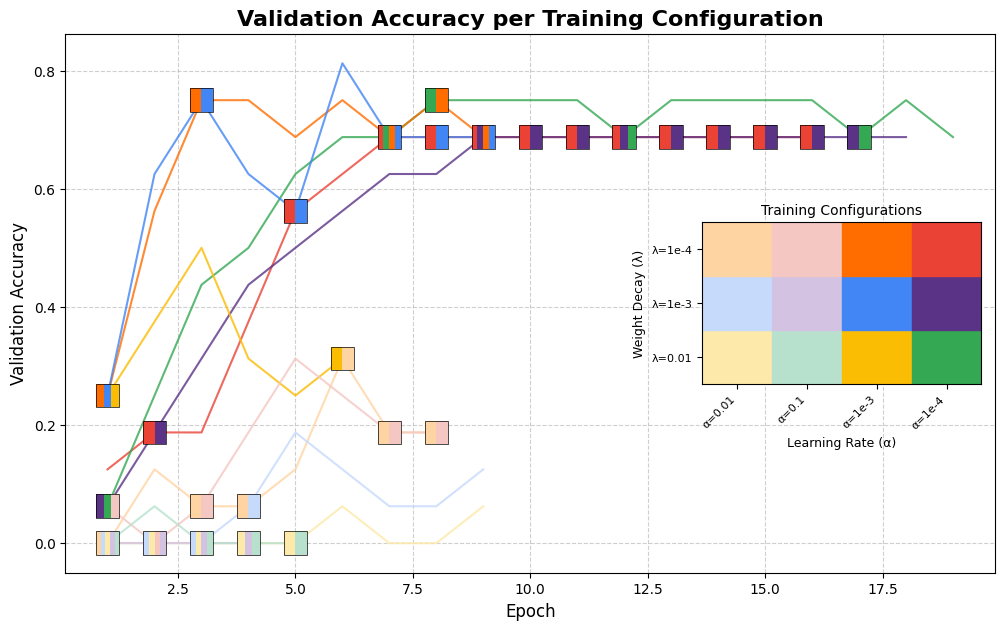

In [161]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Extract unique values of alpha and lambda
uniqueConfigs = df["Run Configuration"].unique()
alphas = sorted(set([config.split(", ")[0] for config in uniqueConfigs]))
lambdas = sorted(set([config.split(", ")[1] for config in uniqueConfigs]))

# Create a colormap dictionary for mapping colours to configurations
baseColors = [
    "#ea4335",  # red
    "#5a3286",  # purple
    "#34a853",  # green
    "#ff6d01",  # orange
    "#4285f4",  # blue
    "#fbbc04",  # yellow
]
lightColors = [
    "#ffd4a3",  # light orange
    "#c6dafc",  # light blue
    "#fde9a9",  # light yellow
    "#f4c7c3",  # light red
    "#d4c2e2",  # light purple
    "#b7e1cd",  # light green
]
colours = baseColors + lightColors
colorMap = {config: colours[i] for i, config in enumerate(uniqueConfigs)}

# Create figure and main plot
fig, ax = plt.subplots(figsize=(12, 7))

# Plot each configuration's line (without markers)
for config in uniqueConfigs:
    subset = df[df["Run Configuration"] == config]
    ax.plot(
        subset["Epoch"],
        subset["Validation Accuracy"],
        linestyle="-",
        markersize=0,
        alpha=0.8,
        color=colorMap[config],
        label=config,
    )


# Function to draw a composite pie marker at a point (like tube station maps)
def drawRectMarker(ax, x, y, colours, radius):
    xLimits = ax.get_xlim()
    yLimits = ax.get_ylim()

    xRange = abs(xLimits[1] - xLimits[0])
    yRange = abs(yLimits[1] - yLimits[0])

    xRange = 10
    yRange = 0.8

    markerWidth = radius * xRange
    markerHeight = radius * yRange

    n = len(colours)

    # Draw the coloured subdivisions without edges
    segWidth = markerWidth / n
    for i, colour in enumerate(colours):
        rect = patches.Rectangle(
            (x - markerWidth / 2 + i * segWidth, y - markerHeight / 2),
            segWidth,
            markerHeight,
            facecolor=colour,
            edgecolor="none",
            zorder=3,
        )
        ax.add_patch(rect)

    # Draw one border around the whole square
    border = patches.Rectangle(
        (x - markerWidth / 2, y - markerHeight / 2),
        markerWidth,
        markerHeight,
        facecolor="none",
        edgecolor="black",
        lw=0.5,
        zorder=3,
    )
    ax.add_patch(border)


# Group the data by (Epoch, Validation Accuracy)
grouped = (
    df.groupby(["Epoch", "Validation Accuracy"])["Run Configuration"]
    .apply(list)
    .reset_index()
)

# Draw markers for each unique point
markerRadius = 0.05  # adjust this value if needed
for idx, row in grouped.iterrows():
    x = row["Epoch"]
    y = row["Validation Accuracy"]
    configsAtPoint = row["Run Configuration"]
    coloursAtPoint = [colorMap[config] for config in configsAtPoint]
    # Keep unique colours while preserving order
    uniqueColoursAtPoint = list(dict.fromkeys(coloursAtPoint))
    if len(uniqueColoursAtPoint) > 1:
        drawRectMarker(ax, x, y, uniqueColoursAtPoint, markerRadius)
        pass
    else:
        # ax.plot(x, y, marker="o", markersize=10, color=uniqueColoursAtPoint[0],
        #         markeredgecolor="black", alpha=0.9)
        pass

# Improve labels and title
ax.set_xlabel("Epoch", fontsize=12)
ax.set_ylabel("Validation Accuracy", fontsize=12)
ax.set_title(
    "Validation Accuracy per Training Configuration", fontsize=16, fontweight="bold"
)
ax.set_ylim(
    [min(df["Validation Accuracy"]) - 0.05, max(df["Validation Accuracy"]) + 0.05]
)
ax.grid(True, linestyle="--", alpha=0.6)

# Create inset axes for the legend within the main plot
axLegend = inset_axes(ax, width="30%", height="30%", loc="right", borderpad=1)
axLegend.set_xlim(-0.5, len(alphas) - 0.5)
axLegend.set_ylim(-0.5, len(lambdas) - 0.5)
axLegend.set_xticks(range(len(alphas)))
axLegend.set_yticks(range(len(lambdas)))
axLegend.set_xticklabels(alphas, rotation=45, ha="right", fontsize=8)
axLegend.set_yticklabels(lambdas, fontsize=8)
axLegend.set_xlabel("Learning Rate (α)", fontsize=9)
axLegend.set_ylabel("Weight Decay (λ)", fontsize=9)
axLegend.set_title("Training Configurations", fontsize=10)

# Fill grid with colours
for i, alpha in enumerate(alphas):
    for j, lambda_ in enumerate(lambdas):
        configKey = f"{alpha}, {lambda_}"
        if configKey in colorMap:
            axLegend.add_patch(
                plt.Rectangle((i - 0.5, j - 0.5), 1, 1, color=colorMap[configKey])
            )

plt.show()

C:\Users\jack0\AppData\Local\Temp\ipykernel_18368\1570053323.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(peakAcc.index, rotation=45, ha="right")
C:\Users\jack0\AppData\Local\Temp\ipykernel_18368\1570053323.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


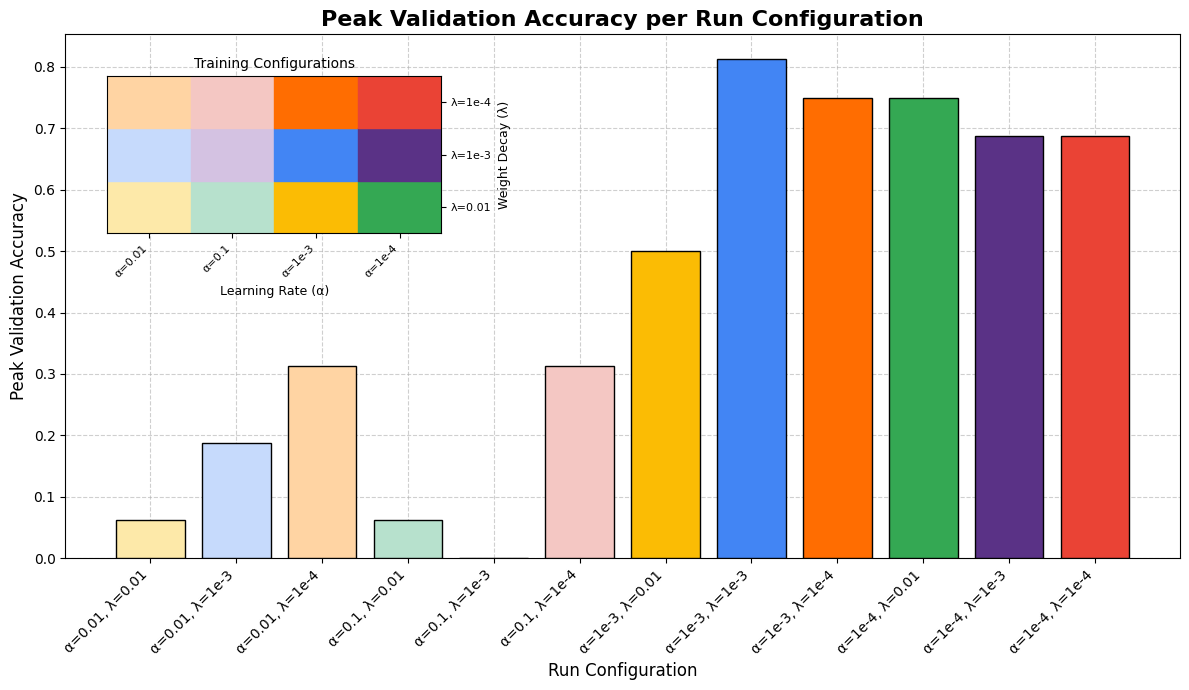

In [162]:
# Compute peak validation accuracy per run config
peakAcc = df.groupby("Run Configuration")["Validation Accuracy"].max()

fig2, ax2 = plt.subplots(figsize=(12, 7))
ax2.bar(peakAcc.index, peakAcc.values, 
        color=[colorMap[config] for config in peakAcc.index],
        edgecolor="black", zorder=3)

ax2.set_xlabel("Run Configuration", fontsize=12)
ax2.set_ylabel("Peak Validation Accuracy", fontsize=12)
ax2.set_title("Peak Validation Accuracy per Run Configuration", fontsize=16, fontweight="bold")
ax2.set_xticklabels(peakAcc.index, rotation=45, ha="right")
ax2.grid(True, linestyle="--", alpha=0.6)

# Inset legend using the same configuration colours
axLegend = inset_axes(ax2, width="30%", height="30%", loc="upper left", borderpad=3)
axLegend.set_xlim(-0.5, len(alphas) - 0.5)
axLegend.set_ylim(-0.5, len(lambdas) - 0.5)
axLegend.set_xticks(range(len(alphas)))
axLegend.set_yticks(range(len(lambdas)))
axLegend.set_xticklabels(alphas, rotation=45, ha="right", fontsize=8)
axLegend.set_yticklabels(lambdas, fontsize=8)
axLegend.set_xlabel("Learning Rate (α)", fontsize=9)
axLegend.set_ylabel("Weight Decay (λ)", fontsize=9)
axLegend.set_title("Training Configurations", fontsize=10)
axLegend.yaxis.set_label_position("right")
axLegend.yaxis.tick_right()

for i, alpha in enumerate(alphas):
    for j, lambda_ in enumerate(lambdas):
        configKey = f"{alpha}, {lambda_}"
        if configKey in colorMap:
            axLegend.add_patch(
                plt.Rectangle((i - 0.5, j - 0.5), 1, 1, color=colorMap[configKey])
            )

plt.tight_layout()
plt.show()
